In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import fasttext
import keras

from underthesea import word_tokenize
from gensim.utils import simple_preprocess

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers, Model

from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,Conv1D,GRU,SpatialDropout1D,Concatenate,Input,Flatten,GlobalMaxPooling1D,Reshape
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import MaxPooling1D,AveragePooling1D, GlobalAveragePooling1D


In [234]:
df=pd.read_csv('data_exam.csv')

In [250]:
df.columns

Index(['text', 'class'], dtype='object')

In [251]:
df2 = pd.read_csv('final.csv',sep=';')
df2.rename(columns = {'review':'text', 'label':'class'}, inplace = True)

restaurant#general, 
restaurant#price,
restaurant#miscellaneous,
food#quality,
food#stype_option,
food#price,
drinks#quality,
drinks#stype_option,
drinks#price,
service#general,
embience#general,
location#general,


In [45]:
label_aspect = {'RESTAURANT#GENERAL':0,'RESTAURANT#PRICE':1,'RESTAURANT#MISCELLANEOUS':2,'FOOD#QUALITY':3,\
               'FOOD#PRICE':4,'FOOD#STYLE&OPTIONS':5,'DRINK#QUALITY':6,'DRINK#PRICE':7,'DRINK#STYLE&OPTIONS':8,\
                'SERVICE#GENERAL':9,'AMBIENCE#GENERAL':10,'LOCATION#GENERAL':11}

In [46]:
label_aspect_rev =  {v: k for k, v in label_aspect.items()}

In [69]:
# label_dict = {'{RESTAURANT#GENERAL#NEG}':0,
#               '{RESTAURANT#GENERAL#NEU}':1,
#               '{RESTAURANT#GENERAL#POS}':2,
              
#               '{RESTAURANT#PRICE#NEG}':3,
#               '{RESTAURANT#PRICE#NEU}':4,
#               '{RESTAURANT#PRICE#POS}':5,
              
#               '{RESTAURANT#MISCELLANEOUS#NEG}':6,
#               '{RESTAURANT#MISCELLANEOUS#NEU}':7,
#               '{RESTAURANT#MISCELLANEOUS#POS}':8, 
              
#               '{FOOD#QUALITY#NEG}':9,
#               '{FOOD#QUALITY#NEU}':10,
#               '{FOOD#QUALITY#POS}':11,
              
#               '{FOOD#PRICE#NEG}':12,
#               '{FOOD#PRICE#NEU}':13,
#               '{FOOD#PRICE#POS}':14,
              
#               '{FOOD#STYLE&OPTIONS#NEG}':15,
#               '{FOOD#STYLE&OPTIONS#NEU}':16,
#               '{FOOD#STYLE&OPTIONS#POS}':17,
              
#               '{DRINK#QUALITY#NEG}':18,
#               '{DRINK#QUALITY#NEU}':19,
#               '{DRINK#QUALITY#POS}':20,
              
#               '{DRINK#PRICE#NEG}':21,
#               '{DRINK#PRICE#NEU}':22,
#               '{DRINK#PRICE#POS}':23,   
              
#               '{DRINK#STYLE&OPTIONS#NEG}':24,
#               '{DRINK#STYLE&OPTIONS#NEU}':25,
#               '{DRINK#STYLE&OPTIONS#POS}':26,
              
#               '{SERVICE#GENERAL#NEG}':27,
#               '{SERVICE#GENERAL#NEU}':28,
#               '{SERVICE#GENERAL#POS}':29,
              
#               '{AMBIENCE#GENERAL#NEG}':30,
#               '{AMBIENCE#GENERAL#NEU}':31,
#               '{AMBIENCE#GENERAL#POS}':32,
              
#               '{LOCATION#GENERAL#NEG}':33,
#               '{LOCATION#GENERAL#NEU}':34,
#               '{LOCATION#GENERAL#POS}':35,}

In [44]:
label_polarity = {'NONE':0,'NEG':1,'NEU':2,'POS':3}

label_polarity_rev = {v: k for k, v in label_polarity.items()}

In [133]:
label_list = df['class'].to_list()

In [134]:
#preprocessing
# i = 0
# for labels in label_list:
#     if isinstance(labels,float) == True:
#         print(i)
#     i = i +1

In [135]:
#preprocessing
# i = 0
# for labels in label_list:
#     for label in labels.split(';'):
#         if label not in label_dict.keys():
#             print(i)
#             print(label)
        
#     i = i + 1

# output normalization

In [213]:
label_aspect_list_encode = []
label_polarity_list_encode = []

for labels in label_list:
    list_temp_aspect = []
    list_temp_polarity = []
    for label in labels.split(';'):
        aspect = label.split('#',2)[0][1:] + '#' +  label.split('#',2)[1]
        polarity = label.split('#',2)[-1][0:-1]
        list_temp_aspect.append(label_aspect[aspect])
        list_temp_polarity.append(label_polarity[polarity])
    label_aspect_list_encode.append(list_temp_aspect)
    label_polarity_list_encode.append(list_temp_polarity)

In [214]:
i= 0
label_list_as_por =[]
for arr in label_aspect_list_encode:
    dic_ = dict(zip(arr,label_polarity_list_encode[i]))
    label_list_as_por.append(dic_)
    i =i +1

In [215]:
polarity_oh = {0:[1,0,0,0],1:[0,1,0,0],2:[0,0,1,0],3:[0,0,0,1]}

In [216]:
label_list_aspect_one_hot = list()
label_list_polarity_one_hot = list()
i= 0 
for labels_aspect in label_aspect_list_encode:
    label_oh_aspect = [0 for _ in range(len(label_aspect))]
    label_oh_polarity = [0 for _ in range(len(label_aspect))]
    for value_aspect in labels_aspect:
        label_oh_aspect[value_aspect] = 1
        label_oh_polarity[value_aspect] = label_list_as_por[i][value_aspect]
    i = i +1
    label_list_aspect_one_hot.append(label_oh_aspect)
    label_list_polarity_one_hot.append(label_oh_polarity)

In [221]:
from numpy import loadtxt
label_list_aspect_one_hot_final = loadtxt('label_list_aspect_one_hot_final.txt', delimiter= ',',dtype = np.int32) 
label_list_polarity_one_hot_final = loadtxt('label_list_polarity_one_hot_final.txt', delimiter= ',',dtype = np.int32) 

In [222]:
label_list_aspect_one_hot_final = label_list_aspect_one_hot_final.tolist()
label_list_polarity_one_hot_final = label_list_polarity_one_hot_final.tolist()

In [223]:
# for i in label_list_aspect_one_hot_final:
#     label_list_aspect_one_hot.append(i)
# for j in label_list_polarity_one_hot_final:
#     label_list_polarity_one_hot.append(j)

In [224]:
for i in range(len(label_list_polarity_one_hot)):
    for j in range(len(label_list_polarity_one_hot[i])):
        label_list_polarity_one_hot[i][j] = polarity_oh[label_list_polarity_one_hot[i][j]]
            

In [225]:
y_aspect = np.array(label_list_aspect_one_hot)
y_polarity = np.array(label_list_polarity_one_hot)

In [226]:
df.shape

(2495, 2)

In [394]:
y_aspect[2495]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [384]:
from numpy import savetxt
savetxt('y_aspect.txt',y_aspect,delimiter= ',',fmt='%d')
# savetxt('label_list_polarity_one_hot_final.txt',y_polarity,delimiter= ',',fmt='%d')

In [388]:
y_polarity[0]

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [389]:
y_polarity_reshape  =  y_polarity.reshape(y_polarity.shape[0],-1)

In [392]:
savetxt('y_polarity.txt',y_polarity_reshape,delimiter= ',',fmt='%d')

In [396]:
loaded_arr = loadtxt("y_polarity.txt",dtype = np.int32,delimiter=',')

In [402]:
y_pol_original = loaded_arr.reshape(
    loaded_arr.shape[0], loaded_arr.shape[1] // y_polarity.shape[2], y_polarity.shape[2])

In [430]:
y_polarity.shape[2]

4

## Preprocessing text

In [367]:
df_3 = pd.concat([df,df2])

In [368]:
df_3.iloc[2495]

text      Ảnh chụp từ hôm qua đi chơi với gia đình và n...
class    {FOOD#STYLE&OPTIONS, neutral}, {FOOD#QUALITY, ...
Name: 0, dtype: object

In [369]:
import string
def clean_text(text):
    text = text.translate(string.punctuation)
    text = text.lower().split()
    text = " ".join(text)
    return text

In [370]:
def remove_number(row):
    row="".join(t for t in row if not t.isdigit())
    return row

In [371]:
def remove_single_character(row):
    row=" ".join(t for t in row.split() if len(t) > 1)
    return row

In [372]:
df_3['text'] = df_3['text'].map(lambda x: clean_text(x)) 

In [373]:
df_3['text'] = df_3['text'].map(lambda x : remove_number(x))
df_3['text'] = df_3['text'].map(lambda x : remove_single_character(x))

In [35]:
original_stopwords = ['bbq','lotte','kfc','foody']
def creat_stopwords(path):
    with open (path, encoding = 'utf-8') as words:
        return [w[:len(w)-1] for w in words] + original_stopwords
stopwords  = creat_stopwords('vietnamese-stopwords.txt')

In [36]:
def word_processing(sentence):
    sentence = " ".join(simple_preprocess(sentence))
    sentence = [word for word in word_tokenize(sentence.lower(),format='text').split() if word not in stopwords]
    return [word for word in sentence if word != ""]

In [376]:
input_sentences =  [word_processing(str(sentence)) for sentence in df_3['text'].values.tolist()]

In [377]:
y_aspect[2496]

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [378]:
input_sentences[2496]

['hương_vị',
 'thơm',
 'ngon_ăn',
 'cay_cay',
 'nêm',
 'nếm',
 'vừa_miệng',
 'menu',
 'quán',
 'món',
 'lựa_chọn',
 'quán',
 'rộng_rãi',
 'view',
 'khá',
 'đẹp',
 'và',
 'thoáng',
 'lắm',
 'quán',
 'đông',
 'nhân_viên',
 'phục_vụ',
 'không',
 'nhanh',
 'lắm',
 'thịt',
 'heo',
 'rừng',
 'giá',
 'kì',
 'trung_bình',
 'hai',
 'đi',
 'chi',
 'ổn']

## Create vocab

In [379]:

threshold = 4# you can change this value according to your need
word_counts = {}
for cap in input_sentences:
	for word in cap:
		word_counts[word] = word_counts.get(word, 0) + 1

vocab = [word for word in word_counts if word_counts[word] >= threshold]

# word mapping to integers
ixtoword = {}
wordtoix = {}

ix = 0
for word in vocab:
	wordtoix[word] = ix
	ixtoword[ix] = word
	ix += 1
	
# find the maximum length of a description in a dataset
max_length = max(len(comment) for comment in input_sentences)
max_length


382

In [380]:
wordtoix['lâu']

157

In [414]:
len(wordtoix)

4040

In [406]:
import pickle
a_file = open("wordtoix_ABSA.pkl", "wb")
pickle.dump(wordtoix, a_file)
a_file.close()

In [421]:
import pickle
a_file = open("ixtoword_ABSA.pkl", "wb")
pickle.dump(ixtoword, a_file)
a_file.close()

## Create input

In [424]:
X=[[wordtoix[word] for word in sentence if word in wordtoix] for sentence in input_sentences ]

In [425]:
X=sequence.pad_sequences(X,max_length)

In [412]:
savetxt('X_absa.txt',X,delimiter=',',fmt ='%d',)

## Embedding matrix

In [415]:
fasttext_model='C:/Users/Administrator/Documents/dataTiki/cc.vi.300.bin'
embedding_index=fasttext.load_model(fasttext_model)

In [416]:
MAX_NB_WORDS=10000
word_not_found=[]
embedding_dim=300
nb_word=min(MAX_NB_WORDS,len(wordtoix))

In [417]:
embedding_matrix=np.zeros((nb_word,embedding_dim))
for word,i in wordtoix.items():
    if i >=nb_word:
        continue
    embedding_vector=embedding_index[word]
    if(embedding_vector is not None) and len(embedding_vector)>0:
        embedding_matrix[i]=embedding_vector
    else:
        word_not_found.append(word)

In [418]:
from numpy import savetxt
savetxt('embedding_matrix_absa.csv',embedding_matrix,delimiter= ',')

# Load data

In [95]:
from numpy import loadtxt
X = loadtxt('X_absa.txt',delimiter=',',dtype = np.int32)
y_aspect = loadtxt('y_aspect.txt',delimiter=',',dtype = np.int32)
loaded_arr = loadtxt("y_polarity.txt",dtype = np.int32,delimiter=',')
y_pol = loaded_arr.reshape(
    loaded_arr.shape[0], loaded_arr.shape[1] //4, 4)
embedding_matrix = loadtxt('embedding_matrix_absa.csv',delimiter=',',dtype = None)
import pickle
a_file = open('wordtoix_ABSA.pkl','rb')
wordtoix = pickle.load(a_file)

a_file = open('ixtoword_ABSA.pkl','rb')
ixtoword = pickle.load(a_file)

In [96]:
max_length  = 382
vocab_size =len(wordtoix)
embedding_dim = 300 

In [99]:
for i in X[2495]:
    print(ixtoword[i])

xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
xe
x

# Model LSTM

In [72]:
from tensorflow.keras.layers import concatenate

In [73]:
from keras.initializers import Constant
def define_model(max_length,embedding_dim,embedding_matrix,vocab_size):
    inputs = Input(shape=(max_length,))
    embedding = Embedding(
                vocab_size,
                embedding_dim,
                embeddings_initializer=Constant(embedding_matrix))(inputs)
    embedding = SpatialDropout1D(0.5)(embedding)
    lstm = Bidirectional(LSTM(64,return_sequences=True))(embedding)
    conv1d = Conv1D(filters=32, kernel_size=3, padding='same')(lstm)
    global_avg_pool = GlobalAveragePooling1D()(conv1d)
    global_max_pool  = GlobalMaxPooling1D()(conv1d)
    concat_layer = Concatenate(axis = -1)([global_avg_pool,global_avg_pool])

    aspect_output = layers.Dense(12, activation="sigmoid",name ='output_aspect')(concat_layer)

    output_pol1 = Dense(4,activation = 'softmax',)(concat_layer)
    output_pol1 = Reshape((-1,4))(output_pol1)

    output_pol2 = Dense(4,activation = 'softmax')(concat_layer)
    output_pol2 = Reshape((-1,4))(output_pol2)

    output_pol3 = Dense(4,activation = 'softmax')(concat_layer)
    output_pol3 = Reshape((-1,4))(output_pol3)

    output_pol4 = Dense(4,activation = 'softmax')(concat_layer)
    output_pol4 = Reshape((-1,4))(output_pol4)

    output_pol5 = Dense(4,activation = 'softmax')(concat_layer)
    output_pol5 = Reshape((-1,4))(output_pol5)

    output_pol6 = Dense(4,activation = 'softmax')(concat_layer)
    output_pol6 = Reshape((-1,4))(output_pol6)

    output_pol7 = Dense(4,activation = 'softmax')(concat_layer)
    output_pol7 = Reshape((-1,4))(output_pol7)

    output_pol8 = Dense(4,activation = 'softmax')(concat_layer)
    output_pol8 = Reshape((-1,4))(output_pol8)

    output_pol9 = Dense(4,activation = 'softmax')(concat_layer)
    output_pol9 = Reshape((-1,4))(output_pol9)

    output_pol10 = Dense(4,activation = 'softmax')(concat_layer)
    output_pol10 = Reshape((-1,4))(output_pol10)

    output_pol11 = Dense(4,activation = 'softmax')(concat_layer)
    output_pol11 = Reshape((-1,4))(output_pol11)

    output_pol12 = Dense(4,activation = 'softmax')(concat_layer)
    output_pol12 = Reshape((-1,4))(output_pol12)

    output_pol = concatenate([output_pol1,output_pol2,output_pol3,output_pol4,output_pol5,
                        output_pol6,output_pol7,output_pol8,output_pol9,output_pol10,output_pol11,output_pol12],name='output_polarity',axis = 1)

    model3 = Model(inputs = inputs ,outputs =[aspect_output,output_pol])
    return model3

In [76]:
model3 = define_model(max_length,embedding_dim,embedding_matrix,vocab_size)

In [77]:
model3.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 382)]        0           []                               
                                                                                                  
 embedding_11 (Embedding)       (None, 382, 300)     1212000     ['input_9[0][0]']                
                                                                                                  
 spatial_dropout1d_4 (SpatialDr  (None, 382, 300)    0           ['embedding_11[0][0]']           
 opout1D)                                                                                         
                                                                                                  
 bidirectional_7 (Bidirectional  (None, 382, 128)    186880      ['spatial_dropout1d_4[0][0]

                                                                  'reshape_82[0][0]',             
                                                                  'reshape_83[0][0]']             
                                                                                                  
Total params: 1,415,100
Trainable params: 1,415,100
Non-trainable params: 0
__________________________________________________________________________________________________


In [78]:
callback = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [82]:
loss = {'output_aspect' : "binary_crossentropy" , 'output_polarity': 'categorical_crossentropy'}
model3.compile(optimizer = 'adam', loss = loss, loss_weights = [0.1,1],metrics=['accuracy'])

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_aspect_train,y_aspect_test,y_pol_train,y_pol_test = train_test_split(X, y_aspect,y_pol,test_size= 0.3 ,random_state=42)

In [85]:
history = model3.fit(X_train,[y_aspect_train,y_pol_train],
                   batch_size=64,
                    epochs=60,
                    validation_data=[X_test, [y_aspect_test,y_pol_test]],callbacks=[callback])

Epoch 1/60
100/100 [==============================] - 95s 953ms/step - loss: 0.5870 - output_aspect_loss: 0.3849 - output_polarity_loss: 0.5485 - output_aspect_accuracy: 0.5088 - output_polarity_accuracy: 0.8126 - val_loss: 0.5574 - val_output_aspect_loss: 0.3614 - val_output_polarity_loss: 0.5212 - val_output_aspect_accuracy: 0.5051 - val_output_polarity_accuracy: 0.8229
Epoch 2/60
100/100 [==============================] - 97s 967ms/step - loss: 0.5553 - output_aspect_loss: 0.3552 - output_polarity_loss: 0.5198 - output_aspect_accuracy: 0.4995 - output_polarity_accuracy: 0.8222 - val_loss: 0.5347 - val_output_aspect_loss: 0.3440 - val_output_polarity_loss: 0.5003 - val_output_aspect_accuracy: 0.5121 - val_output_polarity_accuracy: 0.8268
Epoch 3/60
100/100 [==============================] - 96s 961ms/step - loss: 0.5332 - output_aspect_loss: 0.3406 - output_polarity_loss: 0.4991 - output_aspect_accuracy: 0.5094 - output_polarity_accuracy: 0.8273 - val_loss: 0.5241 - val_output_aspect

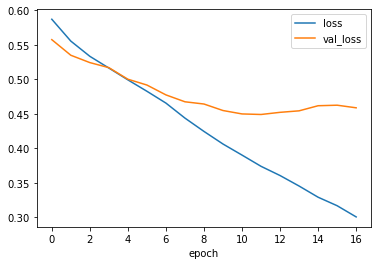

In [86]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show() 

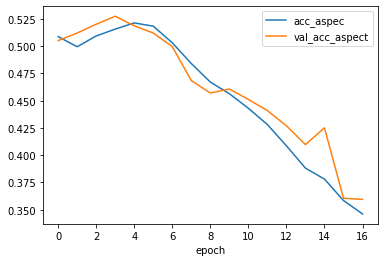

In [87]:
import matplotlib.pyplot as plt
plt.plot(history.history['output_aspect_accuracy'], label='acc_aspec')
plt.plot(history.history['val_output_aspect_accuracy'], label='val_acc_aspect')
plt.xlabel('epoch')
plt.legend()
plt.show() 

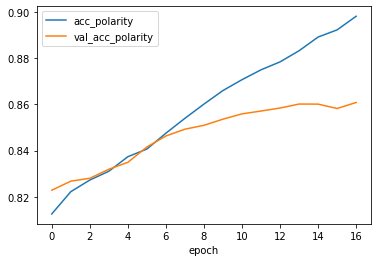

In [88]:
import matplotlib.pyplot as plt
plt.plot(history.history['output_polarity_accuracy'], label='acc_polarity')
plt.plot(history.history['val_output_polarity_accuracy'], label='val_acc_polarity')
plt.xlabel('epoch')
plt.legend()
plt.show() 

## Model Attention model

In [16]:
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
class attention(Layer):
    def __init__(self, return_sequences=True,**kwargs):
        self.return_sequences = return_sequences

        super(attention,self).__init__()
        

    def build(self, input_shape):
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias0", shape=(input_shape[1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias1", shape=(input_shape[1],1)),
        self.b=self.add_weight(name="att_bias2", shape=(input_shape[1],1))

        super(attention,self).build(input_shape)


    def call(self, x):
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        if self.return_sequences:

            return output
        return K.sum(output, axis=1)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "return_sequences": self.return_sequences,
        })
        return config
    
    

In [17]:
from tensorflow.keras.initializers import Constant
def define_model_attetion(max_length,embedding_dim,embedding_matrix,vocab_size):
    inputs1 = Input(shape=(max_length,))
    aspect = Embedding(
            vocab_size,
            embedding_dim,
            embeddings_initializer=Constant(embedding_matrix))(inputs1)
    aspect = Dropout(0.5)(aspect)
    aspect1=Bidirectional(GRU(64,return_sequences=True))(aspect)
    aspect1 = Dropout(0.5)(aspect1)
    aspect2_1 = attention(return_sequences=False)(aspect1)
    aspect2_2 = MaxPooling1D()(aspect1)
    aspect2_2 = Flatten()(aspect2_2)
    aspect2_3 = AveragePooling1D()(aspect1)
    aspect2_3 = Flatten()(aspect2_3)

    aspect3 = Concatenate(axis= -1)([aspect2_1,aspect2_2,aspect2_3])
    aspect3 = Dropout(0.5)(aspect3)
    
    aspect_output = Dense(12,activation='sigmoid',name = 'output_aspect')(aspect3)



    pol = Embedding(
            vocab_size,
            embedding_dim,
            embeddings_initializer=Constant(embedding_matrix))(inputs1)
    pol = Dropout(0.5)(pol)
    pol1 = Bidirectional(GRU(64,return_sequences=True))(pol)
    pol1 = Dropout(0.5)(pol1)
    pol2_1 = Conv1D(filters=32, kernel_size=3, padding='same')(pol1)
    pol2_1 =  MaxPooling1D()(pol2_1)
    pol2_1 =  GlobalMaxPooling1D()(pol2_1)

    pol2_2 = Conv1D(filters=32, kernel_size=4, padding='same')(pol1)
    pol2_2 =  MaxPooling1D()(pol2_2)
    pol2_2 =  GlobalMaxPooling1D()(pol2_2)

    pol2_3 = Conv1D(filters=32, kernel_size=5, padding='same')(pol1)
    pol2_3 =  MaxPooling1D()(pol2_3)
    pol2_3 =  GlobalMaxPooling1D()(pol2_3)

    pol2 = Concatenate(axis = -1)([pol2_1,pol2_2,pol2_3])
    aspect_pol = Concatenate(axis = -1)([aspect3,pol2])
    aspect_pol = Dropout(0.5)(aspect_pol)

    output_pol1 = Dense(4,activation = 'softmax',)(aspect_pol)
    output_pol1 = Reshape((-1,4))(output_pol1)

    output_pol2 = Dense(4,activation = 'softmax')(aspect_pol)
    output_pol2 = Reshape((-1,4))(output_pol2)

    output_pol3 = Dense(4,activation = 'softmax')(aspect_pol)
    output_pol3 = Reshape((-1,4))(output_pol3)

    output_pol4 = Dense(4,activation = 'softmax')(aspect_pol)
    output_pol4 = Reshape((-1,4))(output_pol4)

    output_pol5 = Dense(4,activation = 'softmax')(aspect_pol)
    output_pol5 = Reshape((-1,4))(output_pol5)

    output_pol6 = Dense(4,activation = 'softmax')(aspect_pol)
    output_pol6 = Reshape((-1,4))(output_pol6)

    output_pol7 = Dense(4,activation = 'softmax')(aspect_pol)
    output_pol7 = Reshape((-1,4))(output_pol7)

    output_pol8 = Dense(4,activation = 'softmax')(aspect_pol)
    output_pol8 = Reshape((-1,4))(output_pol8)

    output_pol9 = Dense(4,activation = 'softmax')(aspect_pol)
    output_pol9 = Reshape((-1,4))(output_pol9)

    output_pol10 = Dense(4,activation = 'softmax')(aspect_pol)
    output_pol10 = Reshape((-1,4))(output_pol10)

    output_pol11 = Dense(4,activation = 'softmax')(aspect_pol)
    output_pol11 = Reshape((-1,4))(output_pol11)

    output_pol12 = Dense(4,activation = 'softmax')(aspect_pol)
    output_pol12 = Reshape((-1,4))(output_pol12)



    output_pol = concatenate([output_pol1,output_pol2,output_pol3,output_pol4,output_pol5,
                        output_pol6,output_pol7,output_pol8,output_pol9,output_pol10,output_pol11,output_pol12],name='output_polarity',axis = 1)

    model = Model(inputs = inputs1 ,outputs =[aspect_output,output_pol])
    return model




In [18]:
model = define_model_attetion(max_length=max_length,embedding_dim=embedding_dim,embedding_matrix=embedding_matrix,vocab_size=vocab_size)

In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 382)]        0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 382, 300)     1212000     ['input_5[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 382, 300)     1212000     ['input_5[0][0]']                
                                                                                                  
 dropout_2 (Dropout)            (None, 382, 300)     0           ['embedding_4[0][0]']            
                                                                                            

                                                                                                  
 dense_31 (Dense)               (None, 4)            196484      ['dropout_7[0][0]']              
                                                                                                  
 dense_32 (Dense)               (None, 4)            196484      ['dropout_7[0][0]']              
                                                                                                  
 dense_33 (Dense)               (None, 4)            196484      ['dropout_7[0][0]']              
                                                                                                  
 dense_34 (Dense)               (None, 4)            196484      ['dropout_7[0][0]']              
                                                                                                  
 dense_35 (Dense)               (None, 4)            196484      ['dropout_7[0][0]']              
          

In [20]:
callback = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [22]:
loss = {'output_aspect' : "binary_crossentropy" , 'output_polarity': 'categorical_crossentropy'}
model.compile(optimizer = 'adam', loss = loss, loss_weights = [0.1,1],metrics=['accuracy'])

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_aspect_train,y_aspect_test,y_pol_train,y_pol_test = train_test_split(X, y_aspect,y_pol,test_size= 0.3 ,random_state=42)

In [24]:
len(X_train)

6358

In [25]:
history = model.fit(X_train,[y_aspect_train,y_pol_train],
                   batch_size=64,
                    epochs=60,
                    validation_data=[X_test, [y_aspect_test,y_pol_test]],callbacks=[callback])

Epoch 1/60
100/100 [==============================] - 232s 2s/step - loss: 0.7461 - output_aspect_loss: 0.4467 - output_polarity_loss: 0.7014 - output_aspect_accuracy: 0.5102 - output_polarity_accuracy: 0.7751 - val_loss: 1.4376 - val_output_aspect_loss: 0.5129 - val_output_polarity_loss: 1.3863 - val_output_aspect_accuracy: 0.5191 - val_output_polarity_accuracy: 0.3258
Epoch 2/60
100/100 [==============================] - 220s 2s/step - loss: 0.5997 - output_aspect_loss: 0.3662 - output_polarity_loss: 0.5631 - output_aspect_accuracy: 0.5156 - output_polarity_accuracy: 0.8103 - val_loss: 1.1103 - val_output_aspect_loss: 0.4552 - val_output_polarity_loss: 1.0648 - val_output_aspect_accuracy: 0.5077 - val_output_polarity_accuracy: 0.5830
Epoch 3/60
100/100 [==============================] - 231s 2s/step - loss: 0.5312 - output_aspect_loss: 0.3295 - output_polarity_loss: 0.4983 - output_aspect_accuracy: 0.5151 - output_polarity_accuracy: 0.8279 - val_loss: 0.6400 - val_output_aspect_loss:

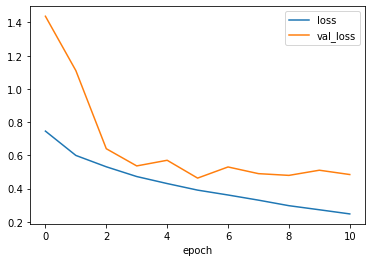

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show() 

In [40]:
history.history['val_loss']

[1.437605619430542,
 1.110342025756836,
 0.6400061845779419,
 0.5364944934844971,
 0.5704748630523682,
 0.463141530752182,
 0.5302160978317261,
 0.48996931314468384,
 0.4795320928096771,
 0.5105892419815063,
 0.48460355401039124]

In [89]:
min(history.history['loss'])


0.3002087473869324

In [90]:
min(history.history['val_loss'])

0.4488087296485901

In [91]:
max(history.history['output_aspect_accuracy'])



0.5213903784751892

In [92]:
max(history.history['val_output_aspect_accuracy'])


0.5275128483772278

In [93]:
max(history.history['output_polarity_accuracy'])

0.8981860280036926

In [94]:
max(history.history['val_output_polarity_accuracy'])

0.8608461618423462

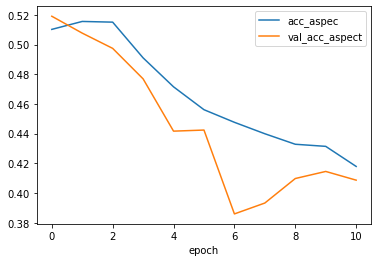

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['output_aspect_accuracy'], label='acc_aspec')
plt.plot(history.history['val_output_aspect_accuracy'], label='val_acc_aspect')
plt.xlabel('epoch')
plt.legend()
plt.show() 


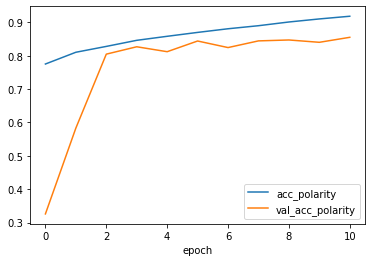

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['output_polarity_accuracy'], label='acc_polarity')
plt.plot(history.history['val_output_polarity_accuracy'], label='val_acc_polarity')
plt.xlabel('epoch')
plt.legend()
plt.show() 

In [32]:
model.save("best_model_attetion_absa.hdf5")

In [34]:
model = load_model('best_model_attetion_absa.hdf5',custom_objects={'attention':attention})

In [61]:
def predict_aspect_pol(text):
    
    token_sample = word_processing(text)
    X_predict=[wordtoix[word] for word in token_sample if word in wordtoix]
    X_predict=sequence.pad_sequences([X_predict],max_length)
    predict= model.predict(X_predict)
    
    i = 0
    label_aspect_pred_lst= []
    for pred in predict[0][0]:
        if pred > 0.0002 :
    #         print(label_aspect_rev[i])
            label_aspect_pred_lst.append(label_aspect_rev[i])
        i = i+1
        
    j =0 
    label_pol_aspect_dict ={}
    for pre_pol in predict[1][0]:
        if pre_pol.argmax() != 0:
    #         print(label_aspect_rev[i],pre_pol.argmax())
            label_pol_aspect_dict[label_aspect_rev[j]]= label_polarity_rev[pre_pol.argmax()]

        j = j +1
    label_aspect_final = {}
    for label in label_pol_aspect_dict.keys():
        if label in label_aspect_pred_lst:
#             print(label,label_pol_aspect_dict[label])
             label_aspect_final[label] = label_pol_aspect_dict[label]
    return label_aspect_final

In [66]:
text = 'Không gian quán rộng chỗ để xe cũng rộng rãi Bún đậm đà ngon rau sống tươi nhiều'

In [67]:
predict_aspect_pol(text)

{'FOOD#QUALITY': 'POS', 'AMBIENCE#GENERAL': 'POS'}

In [68]:
text2 = 'Nằm ngay chợ sặt nhỏ hố nai Chuyên bán bún riêu bánh đa canh bún mình thấy dở ẹc luôn Nước lèo như nước lã vậy Ăn k ăn nhập vào nhau Bún thịt nướng cũng dở lắm Nói chung ko bao giờ trở lại'

In [69]:
predict_aspect_pol(text2)

{'FOOD#QUALITY': 'NEG', 'LOCATION#GENERAL': 'NEG'}

In [70]:
text3 = 'Như tiêu đề mình đã nói phải gọi quán mì quảng này như thế mới đúng Vì không có gì là vị của mì quảng thật sự Góp ý với chủ quán thì ko tiếp thu còn quay lại nói mình đã làm theo liều lượng này nọ nấu ăn ko theo liều lượng thì đem đổ hết ah Và ko bao giờ ăn lại quán này 1 lần nào nữa'

In [71]:
predict_aspect_pol(text3)

{'FOOD#QUALITY': 'NEU'}

# Transformer model

In [53]:
from tensorflow.keras import layers

# soruce:(https://keras.io/examples/nlp/text_classification_with_transformer/)
from keras.initializers import Constant

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1,**kwargs):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation='tanh'), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)
        
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.rate = rate

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "ff_dim": self.ff_dim,
            "rate": self.rate,
        })
        return config

In [54]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim,**kwargs):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
        
        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
  

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "maxlen": self.maxlen,
            "vocab_size": self.vocab_size,
            "embed_dim": self.embed_dim,
        })
        return config

    
   

In [55]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # 
vocab_size = len(wordtoix)

In [56]:
inputs = layers.Input(shape=(max_length,))
embedding_layer = TokenAndPositionEmbedding(max_length, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.5)(x)
aspect_output = layers.Dense(12, activation="sigmoid",name ='output_aspect')(x)

output_pol1 = Dense(4,activation = 'softmax',)(x)
output_pol1 = Reshape((-1,4))(output_pol1)

output_pol2 = Dense(4,activation = 'softmax')(x)
output_pol2 = Reshape((-1,4))(output_pol2)

output_pol3 = Dense(4,activation = 'softmax')(x)
output_pol3 = Reshape((-1,4))(output_pol3)

output_pol4 = Dense(4,activation = 'softmax')(x)
output_pol4 = Reshape((-1,4))(output_pol4)

output_pol5 = Dense(4,activation = 'softmax')(x)
output_pol5 = Reshape((-1,4))(output_pol5)

output_pol6 = Dense(4,activation = 'softmax')(x)
output_pol6 = Reshape((-1,4))(output_pol6)

output_pol7 = Dense(4,activation = 'softmax')(x)
output_pol7 = Reshape((-1,4))(output_pol7)

output_pol8 = Dense(4,activation = 'softmax')(x)
output_pol8 = Reshape((-1,4))(output_pol8)

output_pol9 = Dense(4,activation = 'softmax')(x)
output_pol9 = Reshape((-1,4))(output_pol9)

output_pol10 = Dense(4,activation = 'softmax')(x)
output_pol10 = Reshape((-1,4))(output_pol10)

output_pol11 = Dense(4,activation = 'softmax')(x)
output_pol11 = Reshape((-1,4))(output_pol11)

output_pol12 = Dense(4,activation = 'softmax')(x)
output_pol12 = Reshape((-1,4))(output_pol12)

output_pol = concatenate([output_pol1,output_pol2,output_pol3,output_pol4,output_pol5,
                    output_pol6,output_pol7,output_pol8,output_pol9,output_pol10,output_pol11,output_pol12],name='output_polarity',axis = 1)

model2 = Model(inputs = inputs ,outputs =[aspect_output,output_pol])


In [57]:
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 382)]        0           []                               
                                                                                                  
 token_and_position_embedding_1  (None, 382, 32)     141504      ['input_7[0][0]']                
  (TokenAndPositionEmbedding)                                                                     
                                                                                                  
 transformer_block_1 (Transform  (None, 382, 32)     10656       ['token_and_position_embedding_1[
 erBlock)                                                        0][0]']                          
                                                                                            

                                                                                                  
Total params: 154,080
Trainable params: 154,080
Non-trainable params: 0
__________________________________________________________________________________________________


In [59]:
loss = {'output_aspect' : "binary_crossentropy" , 'output_polarity': 'categorical_crossentropy'}
model2.compile(optimizer='adam', loss=loss,loss_weights=[0.1,1],metrics=['accuracy'])

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_aspect_train,y_aspect_test,y_pol_train,y_pol_test = train_test_split(X,y_aspect,y_pol,test_size= 0.3 ,random_state=42)

In [61]:
history = model2.fit(X_train,[y_aspect_train,y_pol_train],
                   batch_size=32,
                    epochs=60,
                    validation_data=[X_test, [y_aspect_test,y_pol_test]],callbacks=[callback])

Epoch 1/60
199/199 [==============================] - 54s 258ms/step - loss: 1.0677 - output_aspect_loss: 0.6318 - output_polarity_loss: 1.0045 - output_aspect_accuracy: 0.2425 - output_polarity_accuracy: 0.6251 - val_loss: 0.6781 - val_output_aspect_loss: 0.4848 - val_output_polarity_loss: 0.6296 - val_output_aspect_accuracy: 0.5301 - val_output_polarity_accuracy: 0.7938
Epoch 2/60
199/199 [==============================] - 48s 244ms/step - loss: 0.7760 - output_aspect_loss: 0.4872 - output_polarity_loss: 0.7273 - output_aspect_accuracy: 0.5201 - output_polarity_accuracy: 0.7707 - val_loss: 0.6371 - val_output_aspect_loss: 0.4266 - val_output_polarity_loss: 0.5944 - val_output_aspect_accuracy: 0.5301 - val_output_polarity_accuracy: 0.7945
Epoch 3/60
199/199 [==============================] - 46s 231ms/step - loss: 0.7043 - output_aspect_loss: 0.4478 - output_polarity_loss: 0.6595 - output_aspect_accuracy: 0.5340 - output_polarity_accuracy: 0.7842 - val_loss: 0.6134 - val_output_aspect

Epoch 23/60
199/199 [==============================] - 53s 266ms/step - loss: 0.4886 - output_aspect_loss: 0.3109 - output_polarity_loss: 0.4576 - output_aspect_accuracy: 0.5011 - output_polarity_accuracy: 0.8309 - val_loss: 0.5298 - val_output_aspect_loss: 0.3401 - val_output_polarity_loss: 0.4958 - val_output_aspect_accuracy: 0.4982 - val_output_polarity_accuracy: 0.8317
Epoch 24/60
199/199 [==============================] - 55s 274ms/step - loss: 0.4878 - output_aspect_loss: 0.3108 - output_polarity_loss: 0.4568 - output_aspect_accuracy: 0.4956 - output_polarity_accuracy: 0.8299 - val_loss: 0.5296 - val_output_aspect_loss: 0.3408 - val_output_polarity_loss: 0.4955 - val_output_aspect_accuracy: 0.5022 - val_output_polarity_accuracy: 0.8338


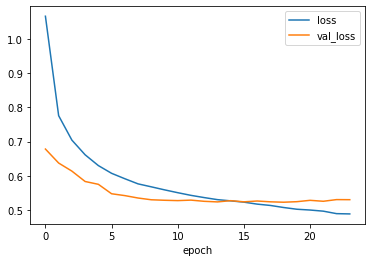

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show() 

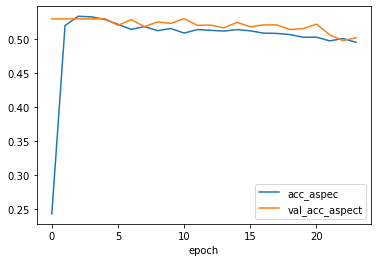

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['output_aspect_accuracy'], label='acc_aspec')
plt.plot(history.history['val_output_aspect_accuracy'], label='val_acc_aspect')
plt.xlabel('epoch')
plt.legend()
plt.show() 


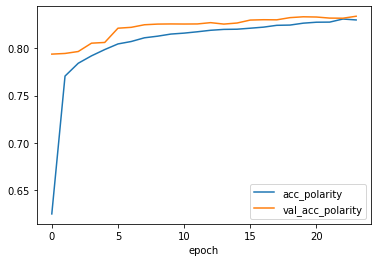

In [65]:
import matplotlib.pyplot as plt
plt.plot(history.history['output_polarity_accuracy'], label='acc_polarity')
plt.plot(history.history['val_output_polarity_accuracy'], label='val_acc_polarity')
plt.xlabel('epoch')
plt.legend()
plt.show() 

In [212]:
model2.save('best_model_absa2.hdf5')

In [201]:
from tensorflow.keras.models import load_model

In [218]:
model2 =load_model('best_model_absa2.hdf5',custom_objects={'TokenAndPositionEmbedding':TokenAndPositionEmbedding,'TransformerBlock':TransformerBlock})

In [227]:
def predict_aspect_pol(text):
    
    token_sample = word_processing(text)
    X_predict=[wordtoix[word] for word in token_sample if word in wordtoix]
    X_predict=sequence.pad_sequences([X_predict],max_length)
    predict= model2.predict(X_predict)
    
    i = 0
    label_aspect_pred_lst= []
    for pred in predict[0][0]:
        if pred >  :
    #         print(label_aspect_rev[i])
            label_aspect_pred_lst.append(label_aspect_rev[i])
        i = i+1
        
    j =0 
    label_pol_aspect_dict ={}
    for pre_pol in predict[1][0]:
        if pre_pol.argmax() != 0:
    #         print(label_aspect_rev[i],pre_pol.argmax())
            label_pol_aspect_dict[label_aspect_rev[j]]= label_polarity_rev[pre_pol.argmax()]

        j = j +1
    label_aspect_final = {}
    for label in label_pol_aspect_dict.keys():
        if label in label_aspect_pred_lst:
#             print(label,label_pol_aspect_dict[label])
             label_aspect_final[label] = label_pol_aspect_dict[label]
    return label_aspect_final

In [231]:
predict_aspect_pol('Lần đầu mình mua ở đây thì rất hài lòng Nhưng càng mua thì càng thất vọng nhân viên làm rất cẩu thả múc đồ ăn cho có ko Rất thích nhưng mong quán sẽ sửa')

{}

In [219]:
token_sample = word_processing(text)
X_predict=[wordtoix[word] for word in token_sample if word in wordtoix]
X_predict=sequence.pad_sequences([X_predict],max_length)
predict= model2.predict(X_predict)

In [247]:
predict[1][0][3].argmax()

3

In [246]:
predict[0].argmax()

3

In [236]:
i = 0
label_aspect_pred_lst = []
for pred in predict[0][0]:
        if pred >  0.002:
    #         print(label_aspect_rev[i])
            label_aspect_pred_lst.append(label_aspect_rev[i])
        i = i+1

In [237]:
label_aspect_pred_lst

['RESTAURANT#GENERAL',
 'RESTAURANT#PRICE',
 'RESTAURANT#MISCELLANEOUS',
 'FOOD#QUALITY',
 'FOOD#PRICE',
 'FOOD#STYLE&OPTIONS',
 'AMBIENCE#GENERAL',
 'LOCATION#GENERAL']